## 01: Importieren der notwendigen Bibliotheken

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns 

## 02: Datensatz laden und erste Übersicht über den Inhalt

In [2]:
# Datensatz wurde geladen mit folgenden Funktionen:
# df = pd.read_csv("URL")
# df.to_csv("Name der Datei", index=False)

df = pd.read_csv("waze_dataset.csv")

| Name der Spalte             | Typ   | Beschreibung                                                                                                                                                                                                                                                                                                                                                                         |
|-----------------------------|-------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ID                          | int   | Ein fortlaufend nummerierter Index                                                                                                                                                                                                                                                                                                                                                   |
| label                       | obj   | Binäre Zielvariable ("beibehalten" vs. "abgewandert") für die Frage, ob ein Benutzer im Laufe des Monats irgendwann abgewandert ist                                                                                                                                                                                                                                                   |
| Sessions                   | int   | Die Anzahl der Fälle, in denen ein Nutzer die App im Laufe des Monats geöffnet hat                                                                                                                                                                                                                                                                                                    |
| Fahrten                   | int   | Anzahl der Fahrten von mindestens 1 km im Laufe des Monats                                                                                                                                                                                                                                                                                                                            |
| Devices                       | obj   | Der Typ des Geräts, mit dem ein Benutzer eine Sitzung beginnt                                                                                                                                                                                                                                                                                                                         |
| total_sessions              | float | Eine Modellschätzung der Gesamtzahl der Sessions seit dem Onboarding eines Benutzers                                                                                                                                                                                                                                                                                                 |
| n_days_after_onboarding     | int   | Die Anzahl der Tage, seit sich ein Benutzer für die App angemeldet hat                                                                                                                                                                                                                                                                                                                |
| gesamt_navigationen_fav1    | int   | Gesamtzahl der Navigationen seit dem Onboarding zum Lieblingsort des Benutzers 1                                                                                                                                                                                                                                                                                                      |
| total_navigations_fav2      | int   | Gesamtzahl der Navigationen seit dem Onboarding zum Lieblingsort des Benutzers 2                                                                                                                                                                                                                                                                                                      |
| gefahrene_km_Fahrten        | float | Insgesamt gefahrene Kilometer während des Monats                                                                                                                                                                                                                                                                                                                                      |
| dauer_Minuten_Fahrten       | float | Gesamtdauer der Fahrten in Minuten während des Monats                                                                                                                                                                                                                                                                                                                                |
| aktivität_tage              | int   | Anzahl der Tage, an denen der Benutzer die App im Laufe des Monats öffnet                                                                                                                                                                                                                                                                                                            |
| driving_days                | int   | Anzahl der Tage, an denen der Benutzer im Laufe des Monats mit dem Auto fährt (mindestens 1 km)                                                                                                                                                                                                                                                                                       |


In [3]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [4]:
df.sample(n=15)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
7853,7853,retained,48,39,116.224398,689,343,0,4517.427465,1752.334431,16,13,Android
13971,13971,retained,95,80,129.520997,3080,0,84,7646.863470,6062.113997,12,12,iPhone
11439,11439,retained,50,41,86.535899,1370,52,0,2854.906650,1610.693769,7,7,Android
5769,5769,retained,8,8,49.271905,2900,75,0,3661.204254,2305.621608,27,21,Android
9058,9058,retained,30,25,29.979693,1137,40,77,1300.044938,765.368200,30,19,Android
14341,14341,churned,18,15,19.553860,944,36,20,11921.014570,4070.436318,11,8,Android
13514,13514,retained,1,1,129.926357,2571,134,23,7595.905685,5719.169461,22,16,iPhone
12384,12384,retained,81,81,135.421403,1719,1,17,2721.989700,867.651598,0,0,iPhone
7615,7615,retained,102,83,134.764089,1521,671,0,4592.542936,1272.222182,18,17,iPhone
10055,10055,retained,83,67,137.577788,3241,133,0,1078.449254,641.240444,13,13,iPhone


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [6]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [7]:
# Alle Werte bei denen keine Einträge gefunden wurden

df.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

## 03: Bearbeitung / Bereinigung des Datensatzes

In [8]:
# Isolierung der Daten mit NaN Werten

null_df = df[df['label'].isnull()]
null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [9]:
# 0 Werte in Abhängigkeit vom Divice

null_df['device'].value_counts()

# Von den 700 Zeilen mit Nullwerten waren 447 iPhone-Benutzer und 253 Android-Benutzer.

device
iPhone     447
Android    253
Name: count, dtype: int64

In [10]:
# 0 Werte in Abhängigkeit vom Divice in Prozent

null_df['device'].value_counts(normalize=True)

device
iPhone     0.638571
Android    0.361429
Name: proportion, dtype: float64

In [11]:
# Werte des gesamten Datensatzes in Abhängigkeit vom Divice in Prozent

df['device'].value_counts(normalize=True)

# Der Prozentsatz fehlender Werte für jedes Gerät entspricht in etwa der gleichen Darstellung wie in den Gesamtdaten.
# Es gibt keine Hinweise auf eine nicht zufällige Ursache für die fehlenden Daten.
# Vorerst werden diese Werte im Datensatz gelassen

device
iPhone     0.644843
Android    0.355157
Name: proportion, dtype: float64

## 04: Tieferes Verständnis der Daten

In [12]:
# Gegenüberstellung der Abwanderung zu denen die bleiben numerisch und in Prozent

print(df['label'].value_counts())
print()
print(df['label'].value_counts(normalize=True))

# Dieser Datensatz enthält 82 % treue Benutzer und 18 % abgewanderte Benutzer.

label
retained    11763
churned      2536
Name: count, dtype: int64

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64


In [13]:
# Median Werte für alle Columns in Abhängigkeit von Abwanderung oder Bleibenden

df.groupby('label').median(numeric_only=True)

# Dies bietet eine interessante Momentaufnahme der beiden Gruppen:
# Benutzer, die abgewandert sind, haben im letzten Monat durchschnittlich etwa 3 Fahrten mehr gemacht als beibehaltene Benutzer 
# Aber beibehaltene Benutzer haben die App im gleichen Zeitraum an über doppelt so vielen Tagen verwendet wie abgewanderte Benutzer.
# Der durchschnittliche abgewanderte Benutzer ist im letzten Monat 200 Kilometer mehr gefahren und hat 2,5 Stunden mehr gebraucht als der durchschnittliche beibehaltene Benutzer.
#Es scheint, dass abgewanderte Benutzer mehr Fahrten in weniger Tagen gemacht haben und ihre Fahrten weiter und länger waren. 
# Vielleicht deutet dies auf ein Benutzerprofil hin. Erkunden Sie weiter!

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


In [14]:
# Neues Column `km_per_drive`

df['km_per_drive'] = df['driven_km_drives'] / df['drives']

# Gruppiert nach `label`, Median isoliert nach 'km per drive'

median_km_per_drive = df.groupby('label').median(numeric_only=True)[['km_per_drive']]
median_km_per_drive

# Der durchschnittliche Stammnutzer fuhr pro Fahrt etwa einen Kilometer mehr als der durchschnittliche Abwanderer.

,km_per_drive
label,
churned,74.109416
retained,75.014702


In [15]:
# Neues Column `km_per_driving_day`

df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# Gruppiert nach `label`, Median isoliert nach 'km per driving day'

median_km_per_driving_day = df.groupby('label').median(numeric_only=True)[['km_per_driving_day']]
median_km_per_driving_day

,km_per_driving_day
label,
churned,697.541999
retained,289.549333


In [16]:
# Neues Column `drives_per_driving_day`

df['drives_per_driving_day'] = df['drives'] / df['driving_days']

# Gruppiert nach `label`, Median isoliert nach 'drives per driving day'

median_drives_per_driving_day = df.groupby('label').median(numeric_only=True)[['drives_per_driving_day']]
median_drives_per_driving_day

,drives_per_driving_day
label,
churned,10.0000
retained,4.0625


#### Analyse der Fahrdaten von abgesprungenen Nutzern

Abgesprungene Nutzer fuhren im letzten Monat durchschnittlich **698 Kilometer pro Fahrtag** – das sind etwa **240 % der Strecke**,  die weiterhin aktive Nutzer an einem Fahrtag zurücklegten. Auch die Anzahl der **Fahrten pro Fahrtag** war bei abgesprungenen Nutzern deutlich höher.

#### Interpretation der Daten

Diese Daten zeigen, dass die betrachteten Nutzer – ob aktiv oder abgesprungen – außergewöhnlich viel fahren. Es ist wahrscheinlich, dass die Stichprobe einen hohen Anteil an **Fernfahrern** enthält.

#### Handlungsempfehlung

Die **Waze-App** könnte ihre speziellen Anforderungen möglicherweise nicht ausreichend erfüllen. Es wäre sinnvoll, mehr Daten über diese **„Super-Fahrer“** zu sammeln, um deren Bedürfnisse besser zu verstehen und die App entsprechend anzupassen.


In [17]:
# Unterteilung nach label und device 

df.groupby(['label', 'device']).size()

label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64

In [18]:
# Unterteilung nach label und device in Prozent

df.groupby('label')['device'].value_counts(normalize=True)

# Das Verhältnis von iPhone- und Android-Nutzern ist in der abgewanderten Gruppe und in der verbleibenden Gruppe konsistent 
# Beide Verhältnisse stimmen mit dem Verhältnis überein, das im gesamten Datensatz festgestellt wurde.

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: proportion, dtype: float64

## 05: Visualisierungen

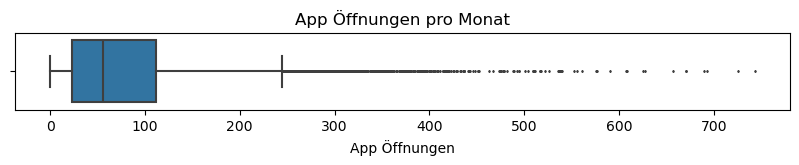

In [19]:
# Box plot

plt.figure(figsize=(10,1))
sns.boxplot(x=df['sessions'], fliersize=1)
plt.title('App Öffnungen pro Monat')
plt.xlabel(xlabel="App Öffnungen")
plt.show()



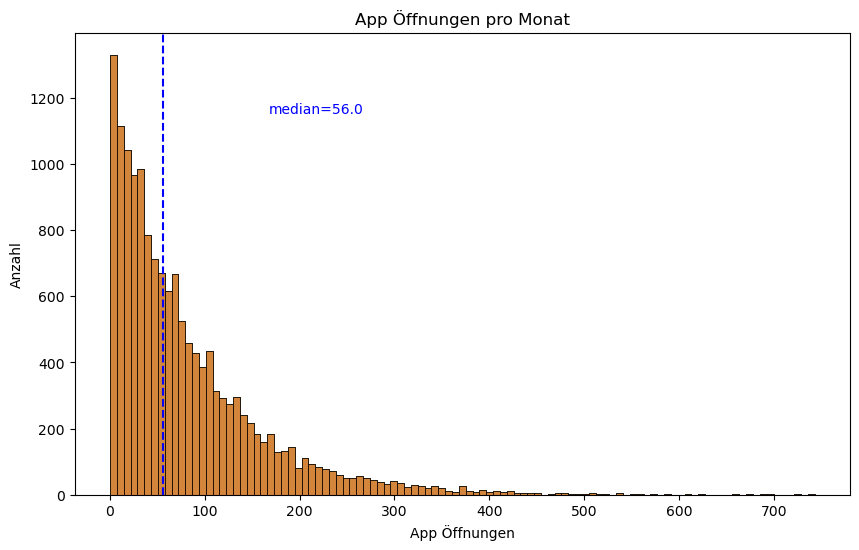

In [20]:
# Histogram

plt.figure(figsize=(10,6))
sns.histplot(x=df['sessions'])
median = df['sessions'].median()
plt.axvline(median, color='blue', linestyle='--')
plt.text(0.25, 0.85, f'median={median}', color='blue',ha='left', va='top', transform=sns.histplot(x=df['sessions']).transAxes)
plt.title('App Öffnungen pro Monat')
plt.xlabel(xlabel=("App Öffnungen"))
plt.ylabel(ylabel="Anzahl")
plt.show()

# Die Variable „Sessions“ ist eine rechtsschiefe Verteilung, wobei die Hälfte der Beobachtungen 56 oder weniger App Öffnungen pro Monat hat. 
# Wie der Boxplot jedoch zeigt, haben einige Benutzer mehr als 700 Öffnungen pro Monat

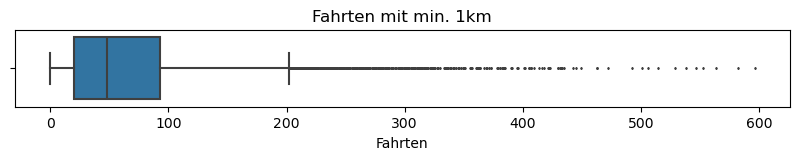

In [21]:
# Box plot

plt.figure(figsize=(10,1))
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('Fahrten mit min. 1km')
plt.xlabel(xlabel="Fahrten")
plt.show()


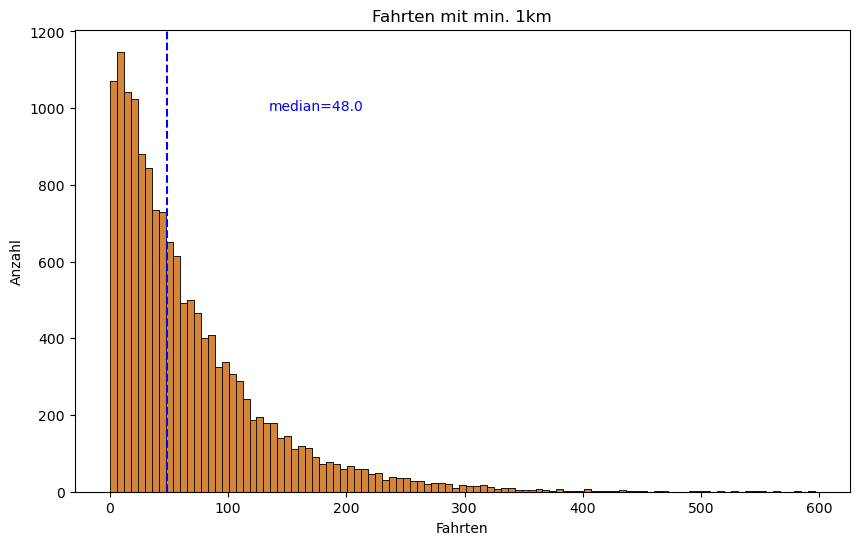

In [22]:
# Histogram

plt.figure(figsize=(10,6))
sns.histplot(x=df['drives'])
median = df['drives'].median()
plt.axvline(median, color='blue', linestyle='--')
plt.text(0.25, 0.85, f'median={median}', color='blue',ha='left', va='top', transform=sns.histplot(x=df['drives']).transAxes)
plt.title('Fahrten mit min. 1km')
plt.xlabel(xlabel=("Fahrten"))
plt.ylabel(ylabel="Anzahl")
plt.show()

# Die Informationen zu „drives“ folgen einer ähnlichen Verteilung wie die Variable „Sessions“. 
# Sie sind rechtsschief, ungefähr logarithmisch normal, mit einem Median von 48. 
# Einige Fahrer hatten im letzten Monat jedoch über 400 Fahrten.

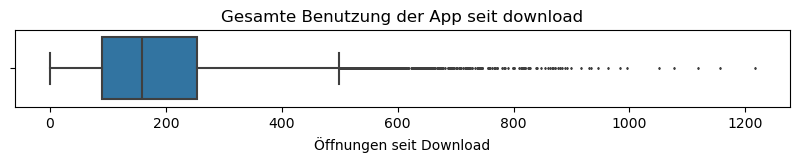

In [23]:
# Box plot

plt.figure(figsize=(10,1))
sns.boxplot(x=df['total_sessions'], fliersize=1)
plt.title('Gesamte Benutzung der App seit download')
plt.xlabel(xlabel="Öffnungen seit Download")
plt.show()

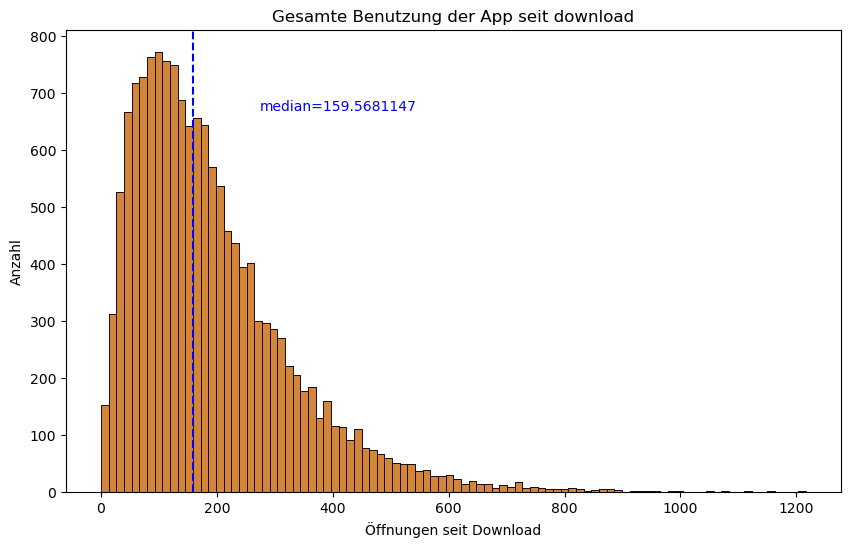

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['total_sessions'])
median = df['total_sessions'].median()
plt.axvline(median, color='blue', linestyle='--')
plt.text(0.25, 0.85, f'median={median}', color='blue',ha='left', va='top', transform=sns.histplot(x=df['total_sessions']).transAxes)
plt.title('Gesamte Benutzung der App seit download')
plt.xlabel(xlabel=("Öffnungen seit Download"))
plt.ylabel(ylabel="Anzahl")
plt.show()

# Die `total_sessions` sind eine rechtsschiefe Verteilung. 
# Die mittlere Gesamtzahl der Sitzungen beträgt 159,6. 
# Dies ist eine interessante Information, denn wenn die mittlere Anzahl der Sitzungen im letzten Monat 56.
# Die mittlere Gesamtzahl der Sitzungen ~160 betrug, dann scheint es, dass ein großer Teil der (geschätzten) 
# Gesamtzahl der Fahrten eines Benutzers im letzten Monat stattgefunden haben könnte.

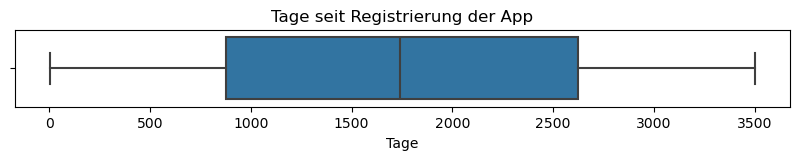

In [25]:
# Box plot

plt.figure(figsize=(10,1))
sns.boxplot(x=df['n_days_after_onboarding'], fliersize=1)
plt.title('Tage seit Registrierung der App')
plt.xlabel(xlabel="Tage")
plt.show()

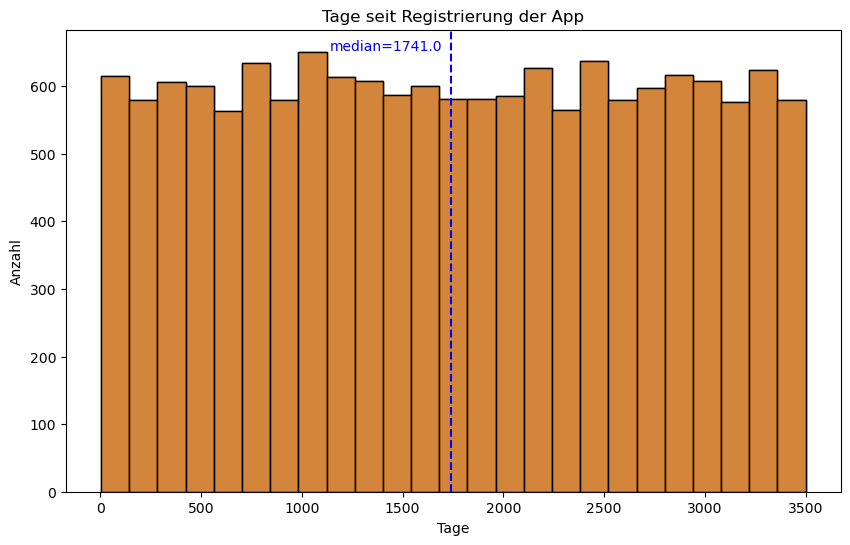

1741.0

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['n_days_after_onboarding'])
median = df['n_days_after_onboarding'].median()
plt.axvline(median, color='blue', linestyle='--')
plt.text(0.34, 0.98, f'median={median}', color='blue',ha='left', va='top', transform=sns.histplot(x=df['n_days_after_onboarding']).transAxes)
plt.title('Tage seit Registrierung der App')
plt.xlabel(xlabel=("Tage"))
plt.ylabel(ylabel="Anzahl")
plt.show()

df['n_days_after_onboarding'].median()

# Die gesamte Benutzerzugehörigkeit (d. h. die Anzahl der Tage seit der Registrierung) 
# ist eine gleichmäßige Verteilung mit Werten von nahezu Null bis ~3.500 (~9,5 Jahre).

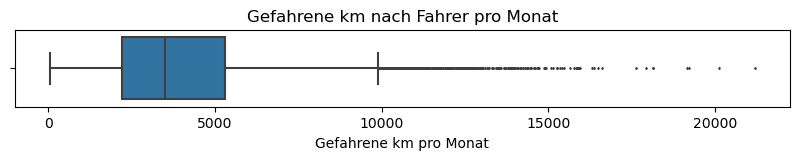

In [27]:
# Box plot
plt.figure(figsize=(10,1))
sns.boxplot(x=df['driven_km_drives'], fliersize=1)
plt.title('Gefahrene km nach Fahrer pro Monat')
plt.xlabel(xlabel="Gefahrene km pro Monat")
plt.show()

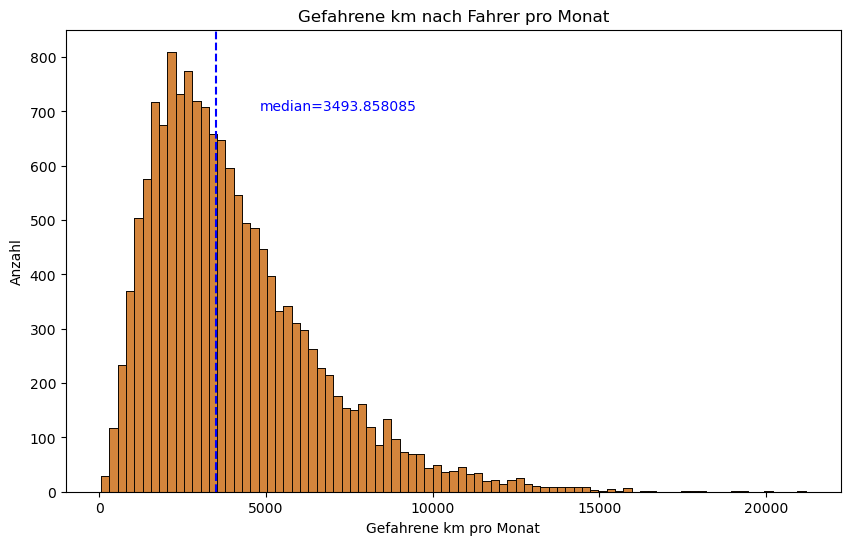

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['driven_km_drives'])
median = df['driven_km_drives'].median()
plt.axvline(median, color='blue', linestyle='--')
plt.text(0.25, 0.85, f'median={median}', color='blue',ha='left', va='top', transform=sns.histplot(x=df['driven_km_drives']).transAxes)
plt.title('Gefahrene km nach Fahrer pro Monat')
plt.xlabel(xlabel=("Gefahrene km pro Monat"))
plt.ylabel(ylabel="Anzahl")
plt.show()

# Die Anzahl der Fahrten, die im letzten Monat pro Benutzer zurückgelegt wurden, ist eine rechtsschiefe Verteilung.
# Wobei die Hälfte der Benutzer weniger als 3.495 Kilometer zurücklegte. 
# Die längste im Monat zurückgelegte Strecke betrug mehr als die Hälfte des Erdumfangs.

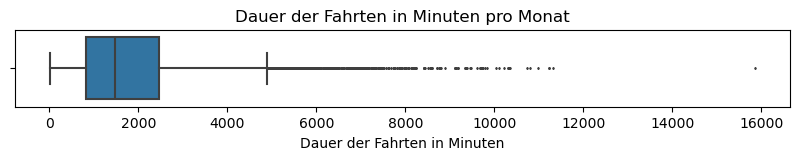

In [29]:
# Box plot

plt.figure(figsize=(10,1))
sns.boxplot(x=df['duration_minutes_drives'], fliersize=1)
plt.title('Dauer der Fahrten in Minuten pro Monat')
plt.xlabel(xlabel="Dauer der Fahrten in Minuten")
plt.show()

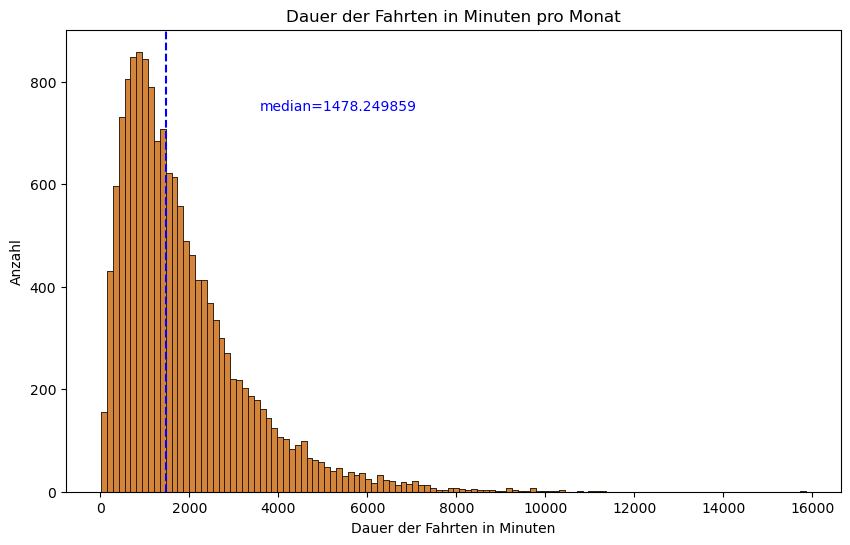

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['duration_minutes_drives'])
median = df['duration_minutes_drives'].median()
plt.axvline(median, color='blue', linestyle='--')
plt.text(0.25, 0.85, f'median={median}', color='blue',ha='left', va='top', transform=sns.histplot(x=df['duration_minutes_drives']).transAxes)
plt.title('Dauer der Fahrten in Minuten pro Monat')
plt.xlabel(xlabel=("Dauer der Fahrten in Minuten"))
plt.ylabel(ylabel="Anzahl")
plt.show()

# Die Variable `duration_minutes_drives` weist einen stark nach rechts verzerrten Rand auf. 
# Die Hälfte der Benutzer fuhr weniger als 1.478 Minuten (25 Stunden), aber einige Benutzer fuhren im Laufe des Monats über 250 Stunden.

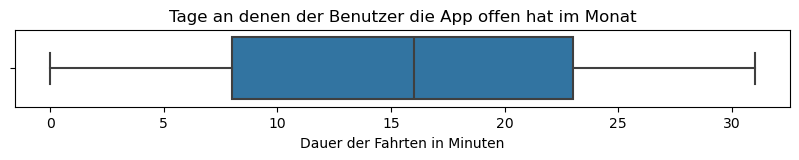

In [31]:
# Box plot

plt.figure(figsize=(10,1))
sns.boxplot(x=df['activity_days'], fliersize=1)
plt.title('Tage an denen der Benutzer die App offen hat im Monat')
plt.xlabel(xlabel="Dauer der Fahrten in Minuten")
plt.show()

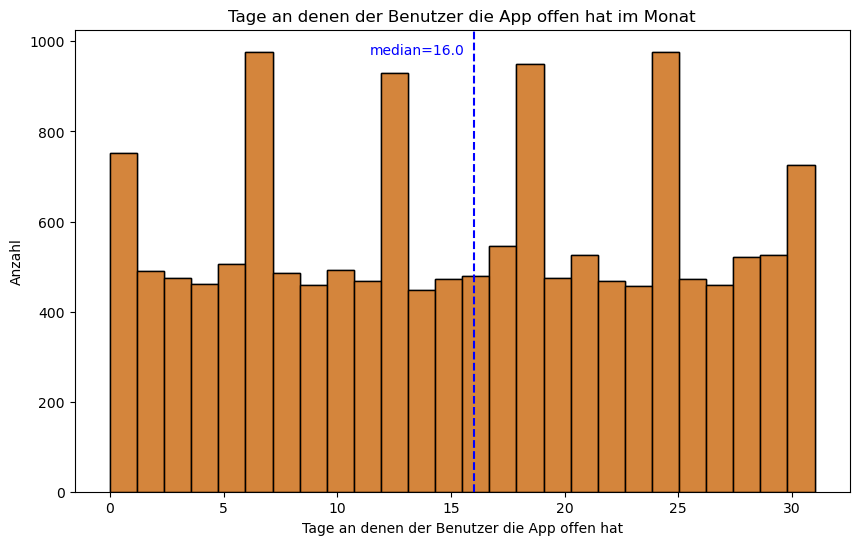

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['activity_days'])
median = df['activity_days'].median()
plt.axvline(median, color='blue', linestyle='--')
plt.text(0.38, 0.97, f'median={median}', color='blue',ha='left', va='top', transform=sns.histplot(x=df['activity_days']).transAxes)
plt.title('Tage an denen der Benutzer die App offen hat im Monat')
plt.xlabel(xlabel=("Tage an denen der Benutzer die App offen hat"))
plt.ylabel(ylabel="Anzahl")
plt.show()

# Im letzten Monat haben Benutzer die App im Durchschnitt 16 Mal geöffnet. 
# Der Boxplot zeigt eine zentrierte Verteilung. 
# Das Histogramm zeigt eine nahezu gleichmäßige Verteilung von ~500 Personen, die die App an jedem Tag geöffnet haben. 
# Es gibt jedoch ~250 Personen, die die App überhaupt nicht geöffnet haben, und ~250 Personen, die die App an jedem Tag des Monats geöffnet haben.

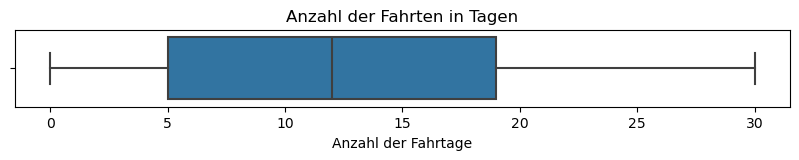

In [33]:
# Box plot

plt.figure(figsize=(10,1))
sns.boxplot(x=df['driving_days'], fliersize=1)
plt.title('Anzahl der Fahrten in Tagen')
plt.xlabel(xlabel="Anzahl der Fahrtage")
plt.show()


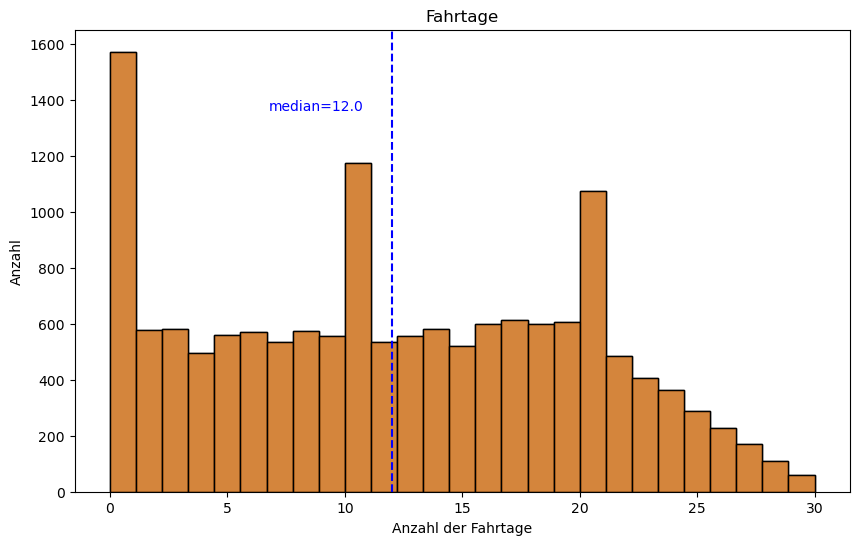

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['driving_days'])
median = df['driving_days'].median()
plt.axvline(median, color='blue', linestyle='--')
plt.text(0.25, 0.85, f'median={median}', color='blue',ha='left', va='top', transform=sns.histplot(x=df['driving_days']).transAxes)
plt.title('Fahrtage')
plt.xlabel(xlabel=("Anzahl der Fahrtage"))
plt.ylabel(ylabel="Anzahl")
plt.show()

# Die Anzahl der Tage, an denen Benutzer jeden Monat gefahren sind, ist nahezu einheitlich und korreliert weitgehend mit der Anzahl der Tage, 
# an denen sie die App in diesem Monat geöffnet haben, außer dass die Verteilung der `driving_days` nach rechts abfällt.
# Es gab jedoch fast doppelt so viele Benutzer (~1.000 gegenüber ~550), die im Laufe des Monats überhaupt nicht gefahren sind. 
# Dies mag kontraintuitiv erscheinen, wenn man es zusammen mit den Informationen aus `activity_days` betrachtet. 
# Diese Variable hatte ~500 Benutzer, die die App an den meisten Tagen geöffnet haben, aber es gab nur ~250 Benutzer, 
# die die App im Laufe des Monats überhaupt nicht geöffnet haben, und ~250 Benutzer, die die App jeden Tag geöffnet haben.

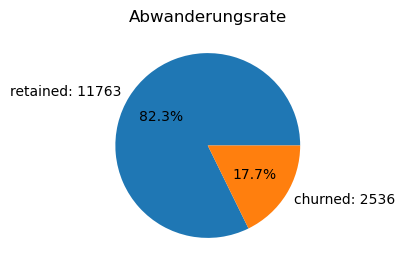

In [35]:
# Pie chart

fig = plt.figure(figsize=(3,3))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Abwanderungsrate')
plt.show()

# weniger als 18% abgewandert


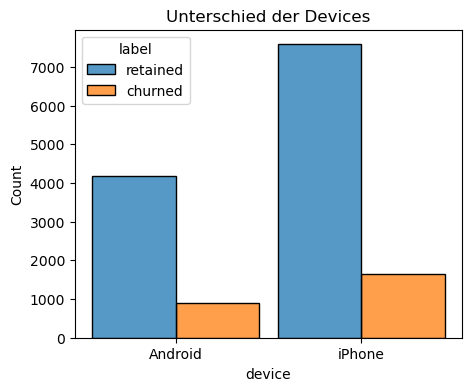

In [36]:
# Histogram

plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Unterschied der Devices')
plt.show()

# Die Verteilung zwischen Android und iPhone bei den Abwanderungen zu verbliebenen Kunden ist etwa gleich